## Supervised Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path and load data

path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 6\Airline Project'
airline_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airline_clean.csv'), index_col = False)
airline_clean.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,25748,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,47529,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,8131,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,11022,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,11024,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


### 2. Data cleaning

In [4]:
airline_clean.shape

(49918, 14)

##### Missing values

In [5]:
# Check for missing values

airline_clean.isnull().sum()

# No missing values to handle

Unnamed: 0            0
num_passengers        0
sales_channel         0
trip_type             0
purchase_to_travel    0
length_of_stay        0
flight_hour           0
flight_day            0
booking_origin        0
extra_baggage         0
preferred_seat        0
in_flight_meals       0
flight_duration       0
booking_complete      0
dtype: int64

##### Duplicates check

In [6]:
#checking for duplicated values
dups = airline_clean.duplicated()

In [7]:
dups.shape # No dups

(49918,)

##### Extreme values checks

C:\Users\31622\AppData\Local\Temp\ipykernel_8272\3334475837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline_clean['length_of_stay'], bins=25) # Shows extreme values


<Axes: xlabel='length_of_stay', ylabel='Density'>

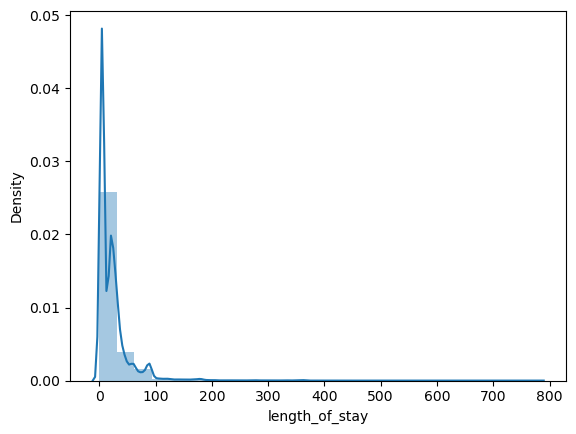

In [8]:
sns.distplot(airline_clean['length_of_stay'], bins=25) # Shows extreme values

In [9]:
airline_clean['length_of_stay'].mean() # Check the mean

23.054809888216674

In [10]:
airline_clean['length_of_stay'].median() # Check the median

17.0

In [11]:
airline_clean['length_of_stay'].max() # Check the max

778

### 3. Data prep for regression analysis 

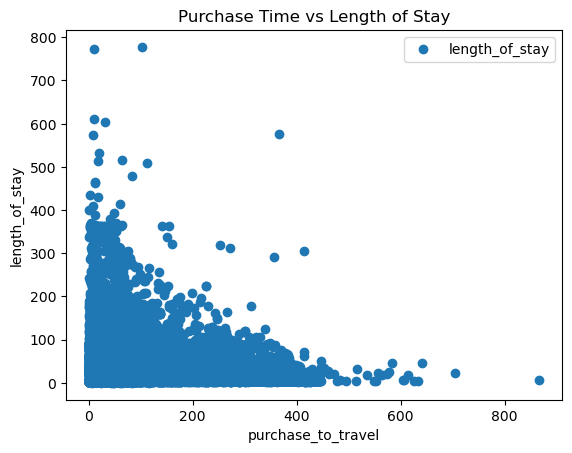

In [12]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

airline_clean.plot(x = 'purchase_to_travel', y='length_of_stay',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Purchase Time vs Length of Stay')  
plt.xlabel('purchase_to_travel')  
plt.ylabel('length_of_stay')  
plt.show()

In [13]:
airline_clean['purchase_to_travel'].max() 

867

In [14]:
#create subset excluding the extreme values in both columns. Value 730 picked which limits both columns to 2 years in (730)days.
airline_new = airline_clean[(airline_clean['purchase_to_travel'] <= 730 ) & (airline_clean['length_of_stay'] <= 730)]
airline_new.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,25748,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,47529,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,8131,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,11022,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,11024,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = airline_new['purchase_to_travel'].values.reshape(-1,1)
y = airline_new['length_of_stay'].values.reshape(-1,1)

In [16]:
X

array([[191],
       [ 27],
       [ 55],
       ...,
       [108],
       [136],
       [ 38]], dtype=int64)

In [17]:
y

array([[ 2],
       [ 6],
       [29],
       ...,
       [ 6],
       [ 6],
       [ 6]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

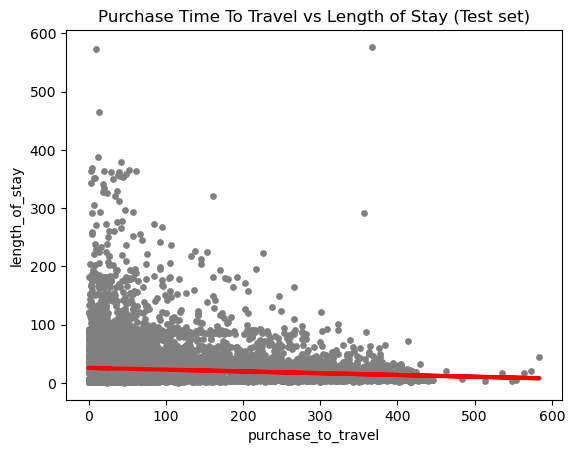

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Purchase Time To Travel vs Length of Stay (Test set)')
plot_test.xlabel('purchase_to_travel')
plot_test.ylabel('length_of_stay')
plot_test.show()

### Hypothesis: The longer the purchase to travel time, the longer the length of stay

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03046853]]
Mean squared error:  1081.7173741801255
R2 score:  0.00438509412831567


#### Our regression analysis shows that as purchase to travel time increases, length of stay decreases at a dregree of 0.0305
#### The MSE is quite large at -1081.71. From this, we can say that a regression model cannot accurately predict the influence of purchase time to travel on length of stay and is not a great fit based on the R2 score of 0.0044.

In [25]:
y_predicted

array([[21.94374195],
       [20.20703597],
       [22.21795868],
       ...,
       [18.86642083],
       [25.11246865],
       [24.80778339]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,31,21.943742
1,3,20.207036
2,21,22.217959
3,6,24.533567
4,5,24.807783
5,4,18.104708
6,6,24.655441
7,32,18.470330
8,4,13.534429
9,5,17.891428


##### Compare how the regression fits the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03046853]]
Mean squared error:  1136.5635792194958
R2 score:  0.00657457771485126


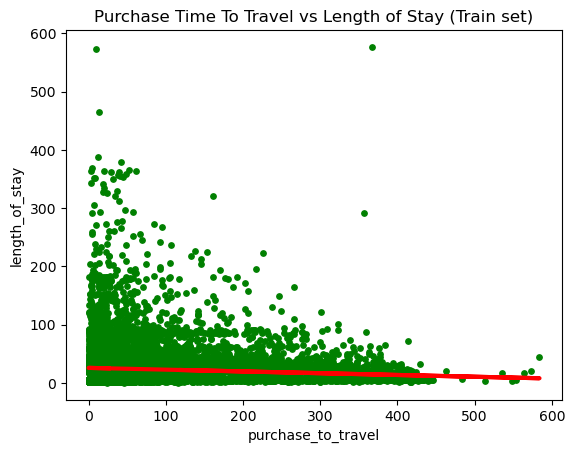

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Purchase Time To Travel vs Length of Stay (Train set)')
plot_test.xlabel('purchase_to_travel')
plot_test.ylabel('length_of_stay')
plot_test.show()

#### There are big differences between our predicted values and actual values in many cases. This model is not good at predicting the purchase time to travel by the length of stay.

#### Performance improvement after removing outliers

In [31]:
#create subset 
subset = airline_clean[(airline_clean['purchase_to_travel'] <= 420 ) & (airline_clean['length_of_stay'] <= 400)]
subset.head()

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_to_travel,length_of_stay,flight_hour,flight_day,booking_origin,extra_baggage,preferred_seat,in_flight_meals,flight_duration,booking_complete
0,25748,1,Internet,RoundTrip,191,2,16,Thu,Afghanistan,0,0,0,4.75,0
1,47529,1,Internet,RoundTrip,27,6,2,Thu,Algeria,0,0,1,6.62,0
2,8131,1,Mobile,RoundTrip,55,29,16,Mon,Argentina,1,0,0,5.52,0
3,11022,1,Internet,RoundTrip,30,18,18,Thu,Argentina,0,1,0,8.58,0
4,11024,1,Internet,RoundTrip,30,42,20,Thu,Argentina,0,0,0,8.58,0


In [32]:
subset.shape

(49736, 14)

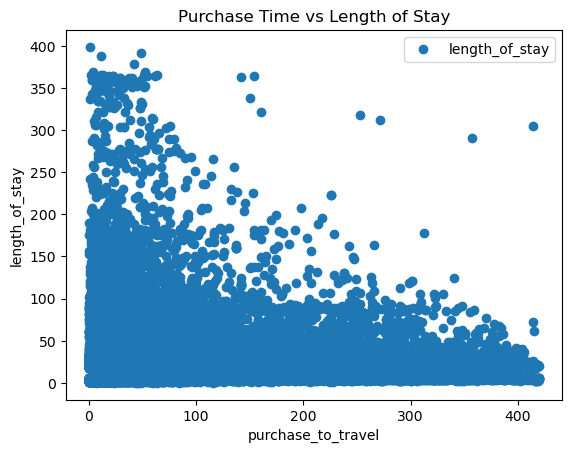

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

subset.plot(x = 'purchase_to_travel', y='length_of_stay',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Purchase Time vs Length of Stay')  
plt.xlabel('purchase_to_travel')  
plt.ylabel('length_of_stay')  
plt.show()

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

Xs = subset['purchase_to_travel'].values.reshape(-1,1)
ys = subset['length_of_stay'].values.reshape(-1,1)

In [35]:
# Split data into a training set and a test set.

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.3, random_state=0)

In [36]:
#create linear regression object
sub_regression = LinearRegression()

In [37]:
#fit regression to training set
sub_regression.fit(Xs_train, ys_train)

LinearRegression()

In [38]:
ys_predicted = sub_regression.predict(Xs_test)

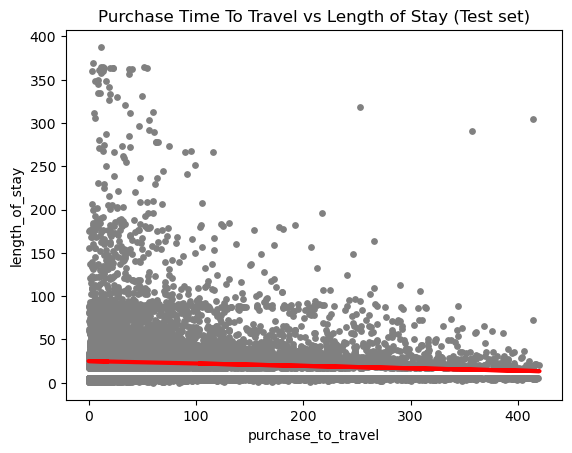

In [39]:
plot_test = plt
plot_test.scatter(Xs_test, ys_test, color='gray', s = 15)
plot_test.plot(Xs_test, ys_predicted, color='red', linewidth =3)
plot_test.title('Purchase Time To Travel vs Length of Stay (Test set)')
plot_test.xlabel('purchase_to_travel')
plot_test.ylabel('length_of_stay')
plot_test.show()

In [40]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(ys_test, ys_predicted)
r2 = r2_score(ys_test, ys_predicted)

In [41]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.03046853]]
Mean squared error:  1112.6527955609365
R2 score:  0.005203171746685387


In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,31,21.943742
1,3,20.207036
2,21,22.217959
3,6,24.533567
4,5,24.807783
5,4,18.104708
6,6,24.655441
7,32,18.470330
8,4,13.534429
9,5,17.891428


### After dropping our extreme values in our subset, the regression model remains a poor fit when predicted values are compared to actual values. 